# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [182]:
print("Для воспроизводимости результатов")

Для воспроизводимости результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [183]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [184]:
df_train.sample(10, random_state = 42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [185]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [186]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [187]:
df_train.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [188]:
df_test.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [189]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [190]:
print("Пропуски в колонках mileage,engine,max_power,torque,seats")

Пропуски в колонках mileage,engine,max_power,torque,seats


In [191]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [192]:
print("Пропуски в колонках mileage,engine,max_power,torque,seats")

Пропуски в колонках mileage,engine,max_power,torque,seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [193]:
df_train.drop("selling_price", axis = 1).duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [194]:
df_train.drop("selling_price", axis = 1)[df_train.drop("selling_price", axis = 1).duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [195]:
df_train = df_train.drop_duplicates(subset=list(df_train.columns[:2]) + list(df_train.columns[3:]),keep='first')

In [196]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [197]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [198]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [199]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].str.extract(r'([0-9.]+)', expand=False))
df_test['mileage'] = pd.to_numeric(df_test['mileage'].str.extract(r'([0-9.]+)', expand=False))
df_train['engine'] = pd.to_numeric(df_train['engine'].str.extract(r'([0-9.]+)', expand=False))
df_test['engine'] = pd.to_numeric(df_test['engine'].str.extract(r'([0-9.]+)', expand=False))
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.extract(r'([0-9.]+)', expand=False))
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.extract(r'([0-9.]+)', expand=False))

In [200]:
print("Для max_torque_rpm берем максимальное значение. Считаю справедливым использование именно этого значения, так как ограничивает пользователя именно максимальное число, им часто руководствуются при покупке")

Для max_torque_rpm берем максимальное значение. Считаю справедливым использование именно этого значения, так как ограничивает пользователя именно максимальное число, им часто руководствуются при покупке


In [201]:
def process_torque_column(column):
    def classify_torque_type(row):
        row = str(row)  
        if re.search(r'\d+\s*-\s*\d+\s*rpm', row):
            return 'range_rpm'
        elif re.search(r'\d+\s*(Nm|kgm)@', row):
            return 'value_torque'
        elif re.search(r'\d+@', row):
            return 'value_rate'
        elif re.search(r'\d+\s*(kgm@|rpm)', row):
            return 'units_last'
        else:
            return 'unknown'

    def extract_max_torque_rpm(row, torque_type):
        if torque_type == 'range_rpm':
            rpm_str = re.findall(r'\d+', row)
            try:
                rpm_values = [float(val.replace(',', '')) for val in rpm_str]
                return max(rpm_values)
            except (ValueError, IndexError):
                pass
        elif torque_type == 'value_torque':
            rpm_str = re.findall(r'\d+', row)
            try:
                rpm_value = float(rpm_str[-1].replace(',', ''))
                return rpm_value
            except (ValueError, IndexError):
                pass
        elif torque_type == 'value_rate':
            rpm_str = re.findall(r'[\d,.]+', row)
            try:
                rpm_value = float(rpm_str[-1].replace(',', '').replace('@', ''))
                return rpm_value
            except (ValueError, IndexError):
                pass
        elif torque_type == 'units_last':
            rpm_str = re.findall(r'\d+', row)
            try:
                rpm_value = float(rpm_str[-1].replace(',', ''))
                return rpm_value
            except (ValueError, IndexError):
                pass
        return None

    processed_data = column.astype(str).apply(lambda x: extract_max_torque_rpm(x, classify_torque_type(x)))
    
    return processed_data


def extract_torque(column):
    def extract_value(row):
        row = str(row)
        match = re.search(r'([\d.]+)', row)
        if match:
            value = float(match.group(1))
            if '@' in row:
                return value
            else:
                return value * 9.80665
        else:
            return None

    torque_values = column.astype(str).apply(extract_value)
    
    return torque_values

In [202]:
df_train['max_torque_rpm'] = process_torque_column(df_train['torque'])
df_train['torque'] = extract_torque(df_train['torque'])
df_test['max_torque_rpm'] = process_torque_column(df_test['torque'])
df_test['torque'] = extract_torque(df_test['torque'])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [203]:
col = df_train.columns[8:]
for i in range(len(col)):
    median = df_train[col[i]].median()
    df_train[col[i]] = df_train[col[i]].fillna(median)
    df_test[col[i]] = df_test[col[i]].fillna(median)

In [204]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [205]:
print("Во-первых, переменная дискретная. Во-вторых, стоимость не зависит линейно от количества seats. То есть увеличение с 1 на 2 и с 3 на 4 имеет разное влияние на стоимость. Еще одна важная причина - по своей природе она как раз и является категориальной переменной")

Во-первых, переменная дискретная. Во-вторых, стоимость не зависит линейно от количества seats. То есть увеличение с 1 на 2 и с 3 на 4 имеет разное влияние на стоимость. Еще одна важная причина - по своей природе она как раз и является категориальной переменной


In [206]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

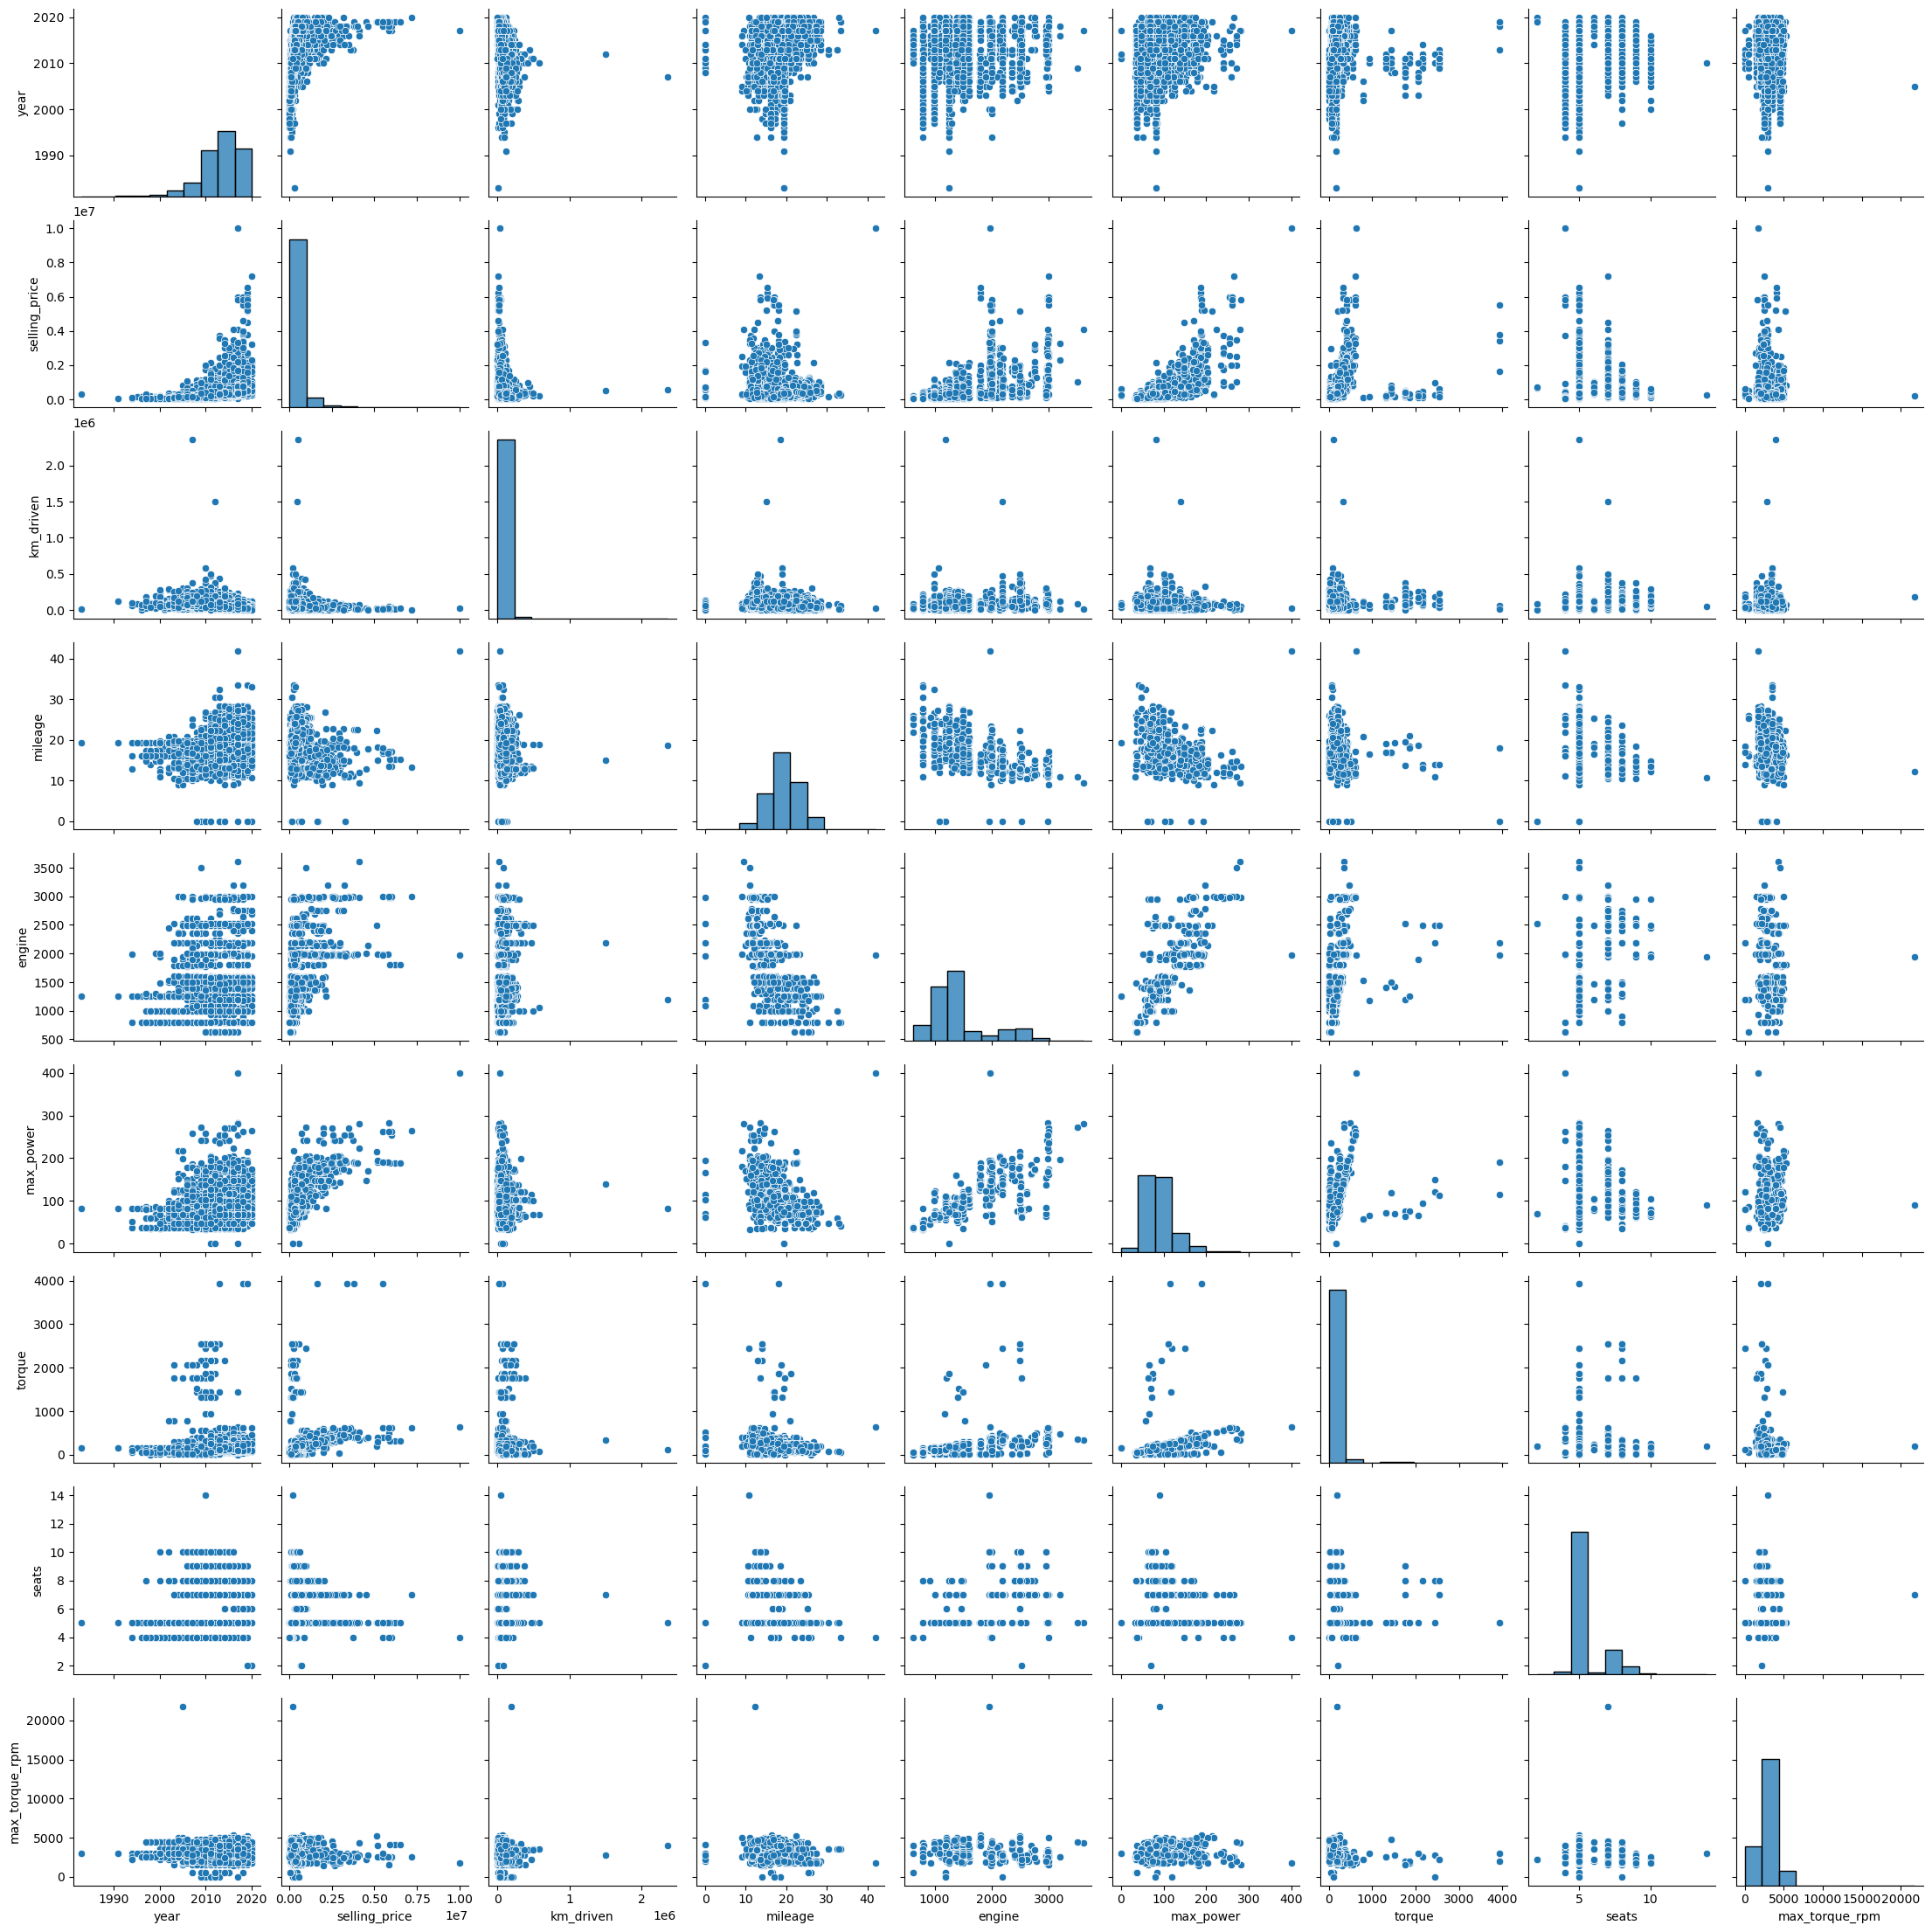

In [27]:
sns.pairplot(df_train, diag_kws={'bins': 10})

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [28]:
print("Сильная прямая связь наблюдается у параметров year, engine, max_power,torque,seats. Средняя обратная связь у параметров km_driven, mileage, max_torque_rpm")

Сильная прямая связь наблюдается у параметров year, engine, max_power,torque,seats. Средняя обратная связь у параметров km_driven, mileage, max_torque_rpm


In [29]:
print("Сильная корреляция наблюдается у engine и seats, max_power и engine, mileage и engine")

Сильная корреляция наблюдается у engine и seats, max_power и engine, mileage и engine


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

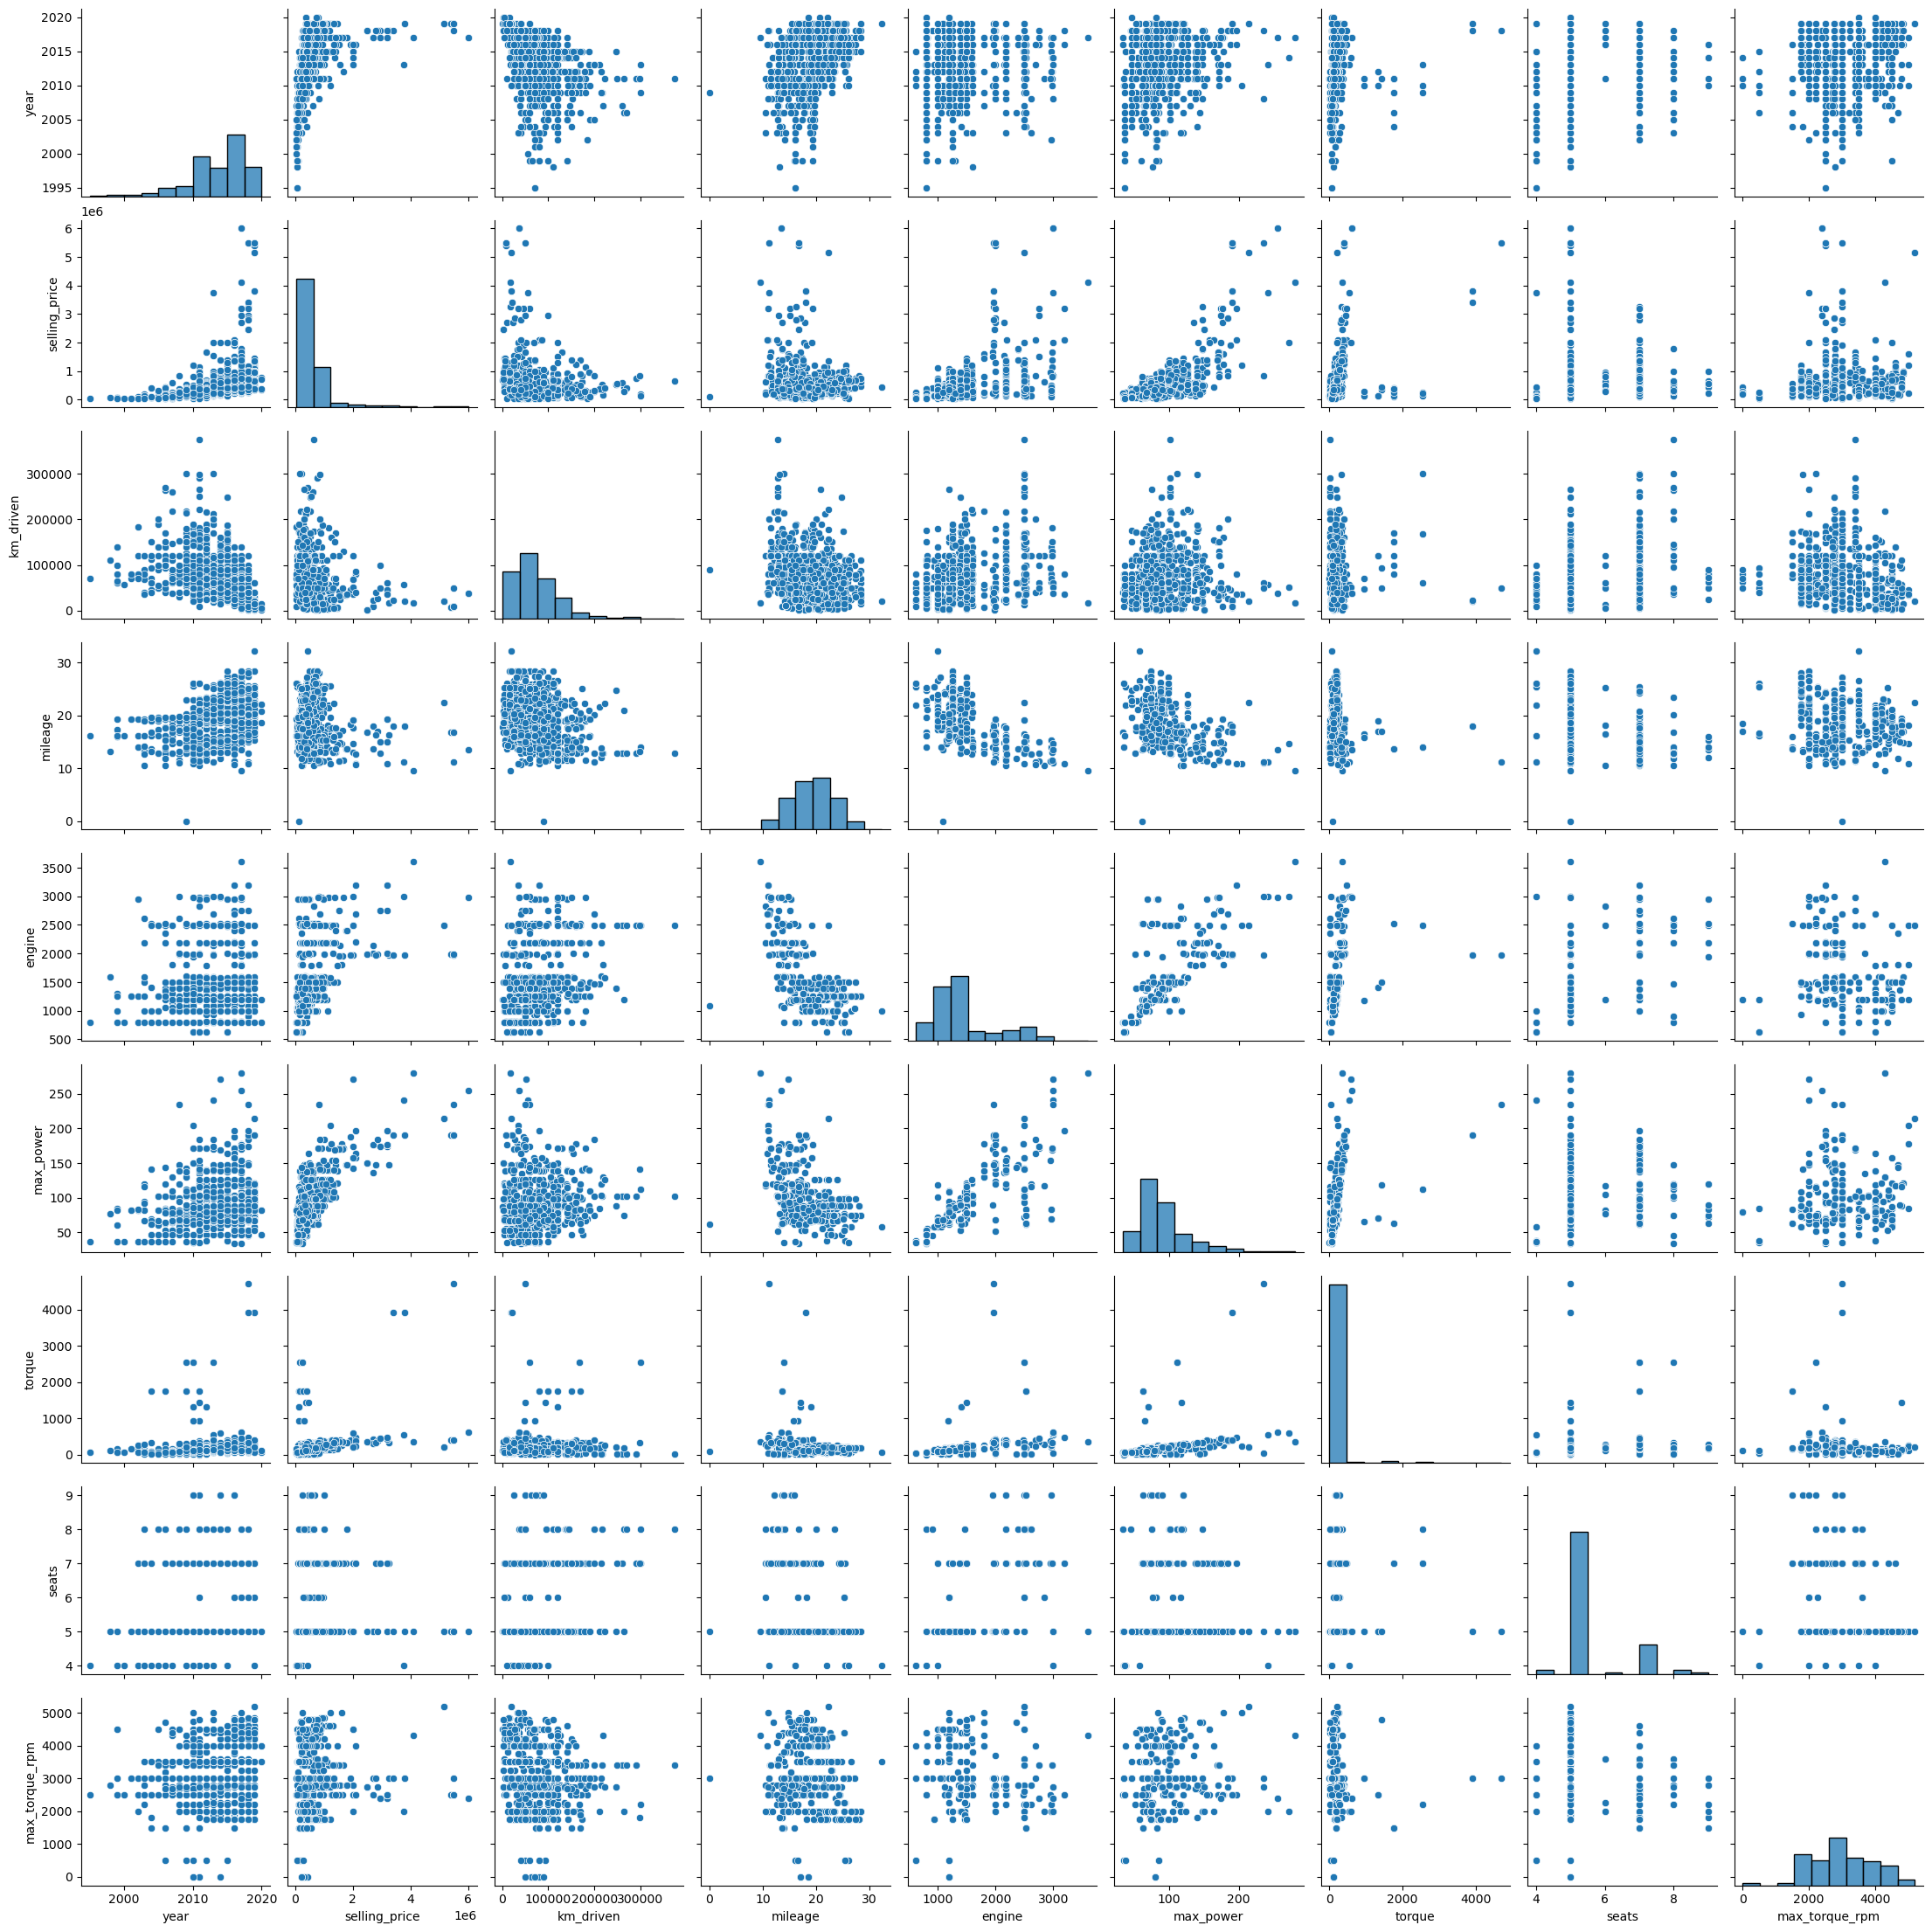

In [30]:
sns.pairplot(df_test, diag_kws={'bins': 10})

In [31]:
print("Многие значение распределены иначе (например selling_price),также у тестовых данных нет такого большого количества выбросов как у трейна")

Многие значение распределены иначе (например selling_price),также у тестовых данных нет такого большого количества выбросов как у трейна


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

C:\Users\PC\AppData\Local\Temp\ipykernel_5792\820319921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<Axes: >

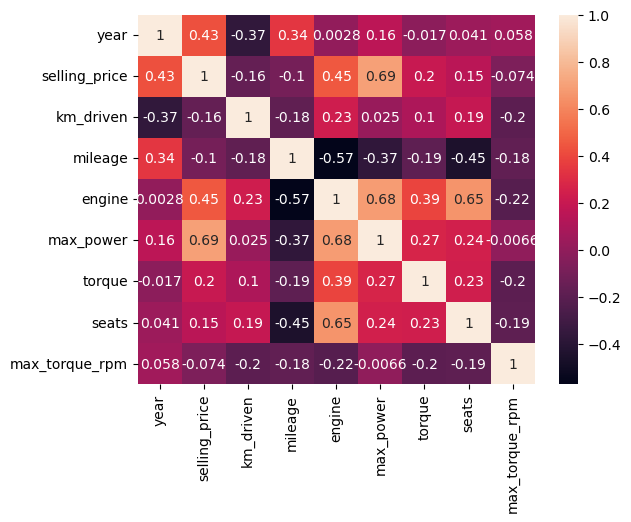

In [32]:
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [33]:
print("Наименьшая корреляция у признаков engine и year")
print("Сильная положительная линейная зависимость у признаков engine и max_power (не считая selling_price)")
print("Да")

Наименьшая корреляция у признаков engine и year
Сильная положительная линейная зависимость у признаков engine и max_power (не считая selling_price)
Да


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

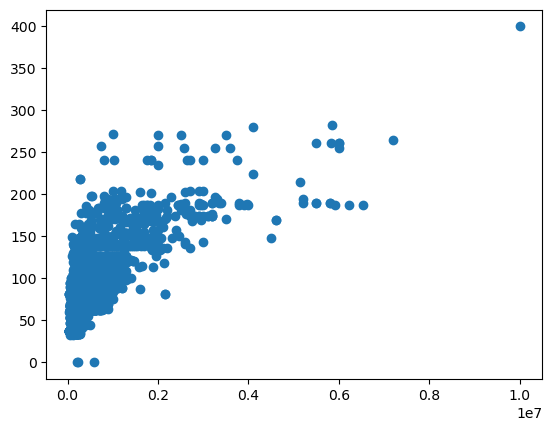

In [34]:
plt.scatter(df_train["selling_price"],df_train["max_power"])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [35]:
print("Можно рассмотреть изменение распределения немного подробнее")

Можно рассмотреть изменение распределения немного подробнее


In [36]:
100 * ((df_test.describe() - df_train.describe()) / df_train.describe()).loc[['mean', 'std']]

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
mean,0.012545,18.154531,-3.460208,-0.473632,1.778799,3.33912,7.593233,-0.436956,1.163747
std,-2.038112,41.671372,-19.285332,-0.858588,7.481097,10.28106,29.012795,-7.067090,-2.072974


In [37]:
print("Такой простой функцией получаем грязные данные, но позволяющие примерно оценить процентные изменения тестовых данных по сравнению с тренировочными")

Такой простой функцией получаем грязные данные, но позволяющие примерно оценить процентные изменения тестовых данных по сравнению с тренировочными


In [38]:
print("Наибольшие отличия у параметра selling_price, его среднее больше на 20%, а стандартное отклонение - выше на 40%. Также можем заметить, что в тесте в среднем ниже пробег автомобиля, как и его разброс. Также разброс существенно отличается для max_power и  torque")

Наибольшие отличия у параметра selling_price, его среднее больше на 20%, а стандартное отклонение - выше на 40%. Также можем заметить, что в тесте в среднем ниже пробег автомобиля, как и его разброс. Также разброс существенно отличается для max_power и  torque


In [39]:
print("Дополнительно заметим что распределение selling_price на самом деле логнормальное. Логарифмируем и получаем нормальное распределение. Можем сделать вывод, что на этапе feature engineering переменную лучше логарифмировать")

Дополнительно заметим что распределение selling_price на самом деле логнормальное. Логарифмируем и получаем нормальное распределение. Можем сделать вывод, что на этапе feature engineering переменную лучше логарифмировать


<Axes: >

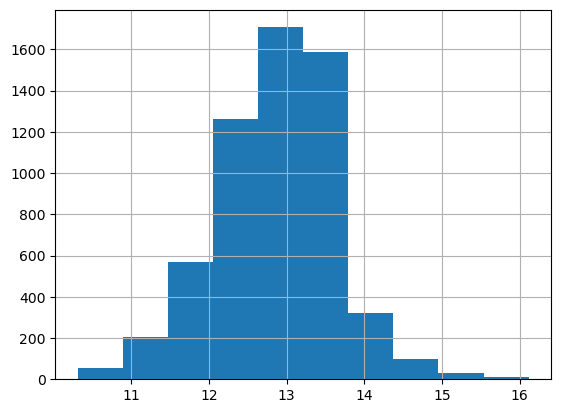

In [40]:
np.log(df_train["selling_price"]).hist()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [41]:
print("Новые признаки torque,max_torque_rpm далее считаем числовыми")

Новые признаки torque,max_torque_rpm далее считаем числовыми


In [42]:
df_numeric = df_train.drop(columns = ["name","fuel","seller_type","transmission","owner"])
y_train = df_numeric["selling_price"]
X_train = df_numeric.drop(columns = ["selling_price"])

In [43]:
print("assert X_train.shape == (5840, 6) изменили на assert X_train.shape == (5840, 8) так как не удаляли признак, а создали два новых числовых")

assert X_train.shape == (5840, 6) изменили на assert X_train.shape == (5840, 8) так как не удаляли признак, а создали два новых числовых


In [44]:
assert X_train.shape == (5840, 8)

In [45]:
df_numeric_test = df_test.drop(columns = ["name","fuel","seller_type","transmission","owner"])
y_test = df_numeric_test["selling_price"]
X_test = df_numeric_test.drop(columns = ["selling_price"])

In [46]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model1 = LinearRegression()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
print(f"Оценка R2: {r2_score(y_test,pred1)}")
print(f"Оценка MSE: {MSE(y_test,pred1)}")

Оценка R2: 0.6039184994828042
Оценка MSE: 227678956857.40744


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [49]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
print(f"Оценка R2: {r2_score(y_test,pred2)}")
print(f"Оценка MSE: {MSE(y_test,pred2)}")

Оценка R2: 0.6039184994828026
Оценка MSE: 227678956857.40833


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [50]:
pd.DataFrame(model2.coef_, index=X_train.columns, columns=["Coef"])

,Coef
year,164525.484870
km_driven,-48299.720773
mileage,-3498.030972
engine,24400.269509
max_power,331884.177840
torque,11644.660724
seats,-28601.063347
max_torque_rpm,-54558.965157


In [51]:
print("Наиболее информативным оказался признак max_power")

Наиболее информативным оказался признак max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [52]:
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
print(f"Оценка R2: {r2_score(y_test,pred3)}")
print(f"Оценка MSE: {MSE(y_test,pred3)}")

Оценка R2: 0.6039170534970607
Оценка MSE: 227679788051.3038


In [53]:
pd.DataFrame(model3.coef_, index=X_train.columns, columns=["Coef"])

,Coef
year,164523.311892
km_driven,-48298.803096
mileage,-3494.895157
engine,24398.208578
max_power,331885.274899
torque,11644.111864
seats,-28597.155008
max_torque_rpm,-54556.931952


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [54]:
print("Не занулила, все признаки информативные для a, default=1.0")

Не занулила, все признаки информативные для a, default=1.0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [55]:
print("GridSearchCV с параметрами по умолчанию (кроме фолдов)")

GridSearchCV с параметрами по умолчанию (кроме фолдов)


In [56]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.arange(1,100000,1000)}
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 22001}
0.5824585514053768


In [57]:
model4 = Lasso(alpha = 22001)
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
print(f"Оценка R2: {r2_score(y_test,pred4)}")
print(f"Оценка MSE: {MSE(y_test,pred4)}")

Оценка R2: 0.5732606952761612
Оценка MSE: 245301938168.55826


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [58]:
print("Обучается моделей: Количество значение для параметра * Количество параметров * CV. В моем случае 100*1*10=1000")

Обучается моделей: Количество значение для параметра * Количество параметров * CV. В моем случае 100*1*10=1000


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [59]:
print(f"Лучший коэффициент составил: {lasso_model.best_params_}")

Лучший коэффициент составил: {'alpha': 22001}


In [60]:
print(f"Некоторые веса занулились:")
pd.DataFrame(lasso_model.best_estimator_.coef_, index=X_train.columns, columns=["Coef"])

Некоторые веса занулились:


,Coef
year,147906.216363
km_driven,-25338.857058
mileage,0.000000
engine,0.000000
max_power,326155.590083
torque,0.000000
seats,-0.000000
max_torque_rpm,-28851.680553


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [61]:
from sklearn.linear_model import ElasticNet

params = {'alpha': np.arange(0.01,1,0.05),
         'l1_ratio': np.arange(0.01,1.01,0.05)}
Elastic = ElasticNet()
Elastic_model = GridSearchCV(Elastic, params, cv = 10)
Elastic_model.fit(X_train, y_train)
print(Elastic_model.best_params_)
print(Elastic_model.best_score_)

{'alpha': 0.46, 'l1_ratio': 0.7100000000000001}
0.5805607727548833


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [62]:
print(f"Лучший коэффициент составил: {Elastic_model.best_params_}")

Лучший коэффициент составил: {'alpha': 0.46, 'l1_ratio': 0.7100000000000001}


In [63]:
model5 = ElasticNet(alpha = 0.46,l1_ratio = 0.71 )
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
print(f"Оценка R2: {r2_score(y_test,pred5)}")
print(f"Оценка MSE: {MSE(y_test,pred5)}")

Оценка R2: 0.5746971324660818
Оценка MSE: 244476233053.41086


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [64]:
X_train_cat = df_train.drop(columns = ["name", "selling_price"])
X_test_cat = df_test.drop(columns = ["name", "selling_price"])
y_train_cat = df_train["selling_price"]
y_test_cat = df_test["selling_price"]

In [65]:
print("Снова заменили assert X_train_cat.shape == (5840, 10) на assert X_train_cat.shape == (5840, 12). Так как у нас на 2 столбца больше")

Снова заменили assert X_train_cat.shape == (5840, 10) на assert X_train_cat.shape == (5840, 12). Так как у нас на 2 столбца больше


In [66]:
assert X_train_cat.shape == (5840, 12)

In [67]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [69]:
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


params = {'alpha': np.arange(1,10,0.1)}
Ridge_m = Ridge()
Ridge_model = GridSearchCV(Ridge_m, params, cv = 10, scoring='r2')
Ridge_model.fit(X_train_cat, y_train_cat)
print(Ridge_model.best_params_)
print(Ridge_model.best_score_)

{'alpha': 7.900000000000006}
0.6088781662381539


In [113]:
model6 = Ridge(alpha = 7.9)
model6.fit(X_train_cat, y_train_cat)
pred6 = model6.predict(X_test_cat)
print(f"Оценка R2: {r2_score(y_test_cat,pred6)}")
print(f"Оценка MSE: {MSE(y_test_cat,pred6)}")

Оценка R2: 0.6486646983442269
Оценка MSE: 201957563995.58517


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

##### Список преобразований:
1. Сделаем год квадратичным
2. Логарифмируем selling_price (он распределен логнормально)
3. Сделаем seats категориальной переменной. Чтобы не переобучаться заменим редко встречающиеся на Rare
4. Из Name возьмем первое слово - производителя - и сделаем категориальной переменной. Чтобы не переобучаться заменим редко встречающиеся на Rare
5. Лошадиные силы / расход: max_power / (100 / mileage)
6. Объем двигателя / лошадиные силы: engine / max_power
6. Преобразование torque на два числовых столбца (уже готово ранее)

In [209]:
#1
df_train["year2"] = df_train["year"] **2
df_test["year2"] = df_test["year"] **2

#2
df_train["selling_price"] = np.log(df_train["selling_price"])

#3
df_train["seats"] = df_train["seats"].astype(str)
df_test["seats"] = df_test["seats"].astype(int).astype(str)
object_columns = ['seats']
for col in object_columns:
    unique_values = set(df_train[col].unique()).union(set(df_test[col].unique()))
    for value in unique_values:
        if (df_train[col] == value).sum() < 10 or (df_test[col] == value).sum() < 10:
            df_train.loc[df_train[col] == value, col] = 'Rare'
            df_test.loc[df_test[col] == value, col] = 'Rare'
#4
df_train['name'] = df_train['name'].str.split().str.get(0)
df_test['name'] = df_test['name'].str.split().str.get(0)
object_columns = ['name']
for col in object_columns:
    unique_values = set(df_train[col].unique()).union(set(df_test[col].unique()))
    for value in unique_values:
        if (df_train[col] == value).sum() < 10 or (df_test[col] == value).sum() < 10:
            df_train.loc[df_train[col] == value, col] = 'Rare'
            df_test.loc[df_test[col] == value, col] = 'Rare'

#5
df_train["m/m"] = df_train["max_power"] / (100 / df_train["mileage"])
df_test["m/m"] = df_test["max_power"] / (100 / df_test["mileage"])

In [210]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [211]:
X_train_f = df_train.drop("selling_price",axis = 1)
X_test_f = df_test.drop("selling_price",axis = 1)
y_train_f = df_train["selling_price"]
y_test_f = df_test["selling_price"]

In [219]:
params = {'alpha': np.arange(0,0.1,0.001)}
Ridge_f = Ridge()
Ridge_model_f = GridSearchCV(Ridge_f, params, cv = 10, scoring='r2')
Ridge_model_f.fit(X_train_f, y_train_f)
print(Ridge_model_f.best_params_)
print(Ridge_model_f.best_score_)

{'alpha': 0.0}
0.8753518312060308


In [220]:
model6 = Ridge(alpha = 0)
model6.fit(X_train_f, y_train_f)
pred6 = np.exp(model6.predict(X_test_f))
print(f"Оценка R2: {r2_score(y_test_f,pred6)}")
print(f"Оценка MSE: {MSE(y_test_f,pred6)}")

Оценка R2: 0.8794418054793518
Оценка MSE: 69300292826.68285


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [231]:
def business_metrics(y_true, y_pred):
    # Вычисление разности между предсказанными и реальными ценами
    difference = np.abs(y_true - y_pred)
    # Вычисление доли предсказанных цен, отличающихся от реальных цен на не более 10%
    within_10_percent = (difference <= 0.1 * np.abs(y_true))
    # Вычисление количества предсказанных цен, отличающихся от реальных цен на не более 10%
    count_within_10_percent = np.sum(within_10_percent)
    # Вычисление процента предсказанных цен, отличающихся от реальных цен на не более 10%
    percentage = (count_within_10_percent / len(y_true)) * 100
    return percentage

business_metrics(y_test_f,pred6)

32.1

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link